<a href="https://colab.research.google.com/github/Isaias13Barros/Assignment_6/blob/main/Assignment_19_CLUSTERIZA%C3%87%C3%83O_e_REGRESS%C3%83O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#Importado Dataset 
Link 'https://www.kaggle.com/arjunbhasin2013/ccdata'

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CC GENERAL.csv")

# Remova dados não importantes para análise (CUST_ID)

In [4]:
df.drop(['CUST_ID','BALANCE_FREQUENCY',
       'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY',
       'PRC_FULL_PAYMENT', 'TENURE'], axis=1, inplace=True)

In [5]:
df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,0.00,0.000000,0,2,1000.0,201.802084,139.509787
1,3202.467416,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,773.17,0.000000,0,12,7500.0,622.066742,627.284787
3,1666.670542,1499.00,1499.00,205.788017,1,1,7500.0,0.000000,NaN
4,817.714335,16.00,16.00,0.000000,0,1,1200.0,678.334763,244.791237


In [6]:
df.shape

(8950, 9)

#Estatísticas descritivas

In [7]:
df.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000
mean,1564.474828,1003.204834,592.437371,978.871112,3.248827,14.709832,4494.449450,1733.143852,864.206542
std,2081.531879,2136.634782,1659.887917,2097.163877,6.824647,24.857649,3638.815725,2895.063757,2372.446607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163
25%,128.281915,39.635000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707
50%,873.385231,361.280000,38.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947
75%,2054.140036,1110.130000,577.405000,1113.821139,4.000000,17.000000,6500.000000,1901.134317,825.485459
max,19043.138560,49039.570000,40761.250000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520


#Verificando se há duplicatas

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

BALANCE               0
PURCHASES             0
ONEOFF_PURCHASES      0
CASH_ADVANCE          0
CASH_ADVANCE_TRX      0
PURCHASES_TRX         0
CREDIT_LIMIT          1
PAYMENTS              0
MINIMUM_PAYMENTS    313
dtype: int64

#Substituido os valores ausentes de MINIMUM_PAYMENTS pelo valor médio

In [10]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].min(),inplace=True)

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].min(),inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BALANCE           8950 non-null   float64
 1   PURCHASES         8950 non-null   float64
 2   ONEOFF_PURCHASES  8950 non-null   float64
 3   CASH_ADVANCE      8950 non-null   float64
 4   CASH_ADVANCE_TRX  8950 non-null   int64  
 5   PURCHASES_TRX     8950 non-null   int64  
 6   CREDIT_LIMIT      8950 non-null   float64
 7   PAYMENTS          8950 non-null   float64
 8   MINIMUM_PAYMENTS  8950 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 629.4 KB


In [12]:
df.isnull().sum()

BALANCE             0
PURCHASES           0
ONEOFF_PURCHASES    0
CASH_ADVANCE        0
CASH_ADVANCE_TRX    0
PURCHASES_TRX       0
CREDIT_LIMIT        0
PAYMENTS            0
MINIMUM_PAYMENTS    0
dtype: int64

In [13]:
df.nunique()

BALANCE             8871
PURCHASES           6203
ONEOFF_PURCHASES    4014
CASH_ADVANCE        4323
CASH_ADVANCE_TRX      65
PURCHASES_TRX        173
CREDIT_LIMIT         205
PAYMENTS            8711
MINIMUM_PAYMENTS    8636
dtype: int64

In [14]:
df.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,0.00,0.000000,0,2,1000.0,201.802084,139.509787
1,3202.467416,0.00,0.00,6442.945483,4,0,7000.0,4103.032597,1072.340217
2,2495.148862,773.17,773.17,0.000000,0,12,7500.0,622.066742,627.284787
3,1666.670542,1499.00,1499.00,205.788017,1,1,7500.0,0.000000,0.019163
4,817.714335,16.00,16.00,0.000000,0,1,1200.0,678.334763,244.791237


In [15]:
df.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,978.871112,3.248827,14.709832,4493.952864,1733.143852,833.984123
std,2081.531879,2136.634782,1659.887917,2097.163877,6.824647,24.857649,3638.915681,2895.063757,2335.989679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163
25%,128.281915,39.635000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164
50%,873.385231,361.280000,38.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402
75%,2054.140036,1110.130000,577.405000,1113.821139,4.000000,17.000000,6500.000000,1901.134317,788.713501
max,19043.138560,49039.570000,40761.250000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520


In [16]:
df.columns


Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS'],
      dtype='object')

In [17]:
df.shape

(8950, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


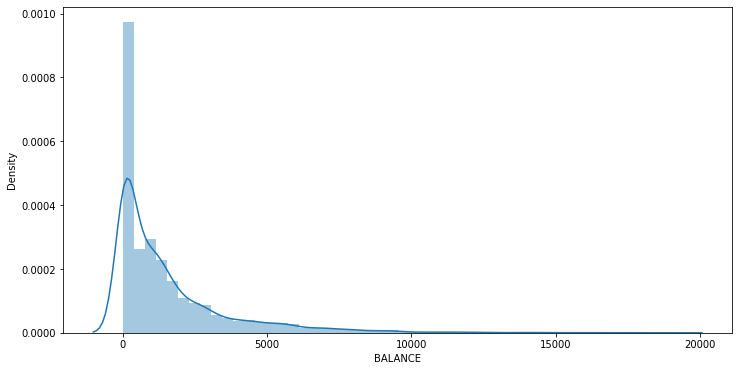

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


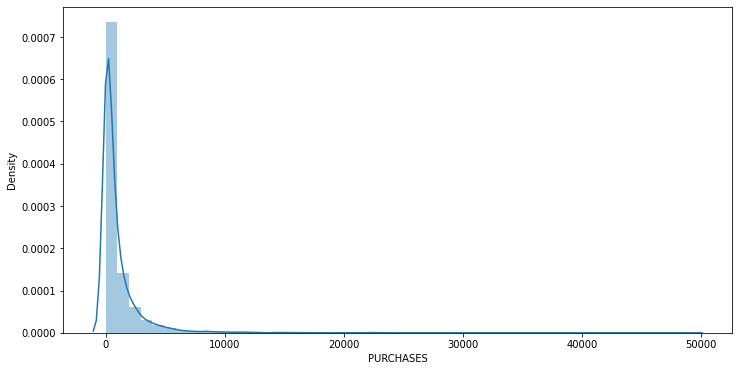

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


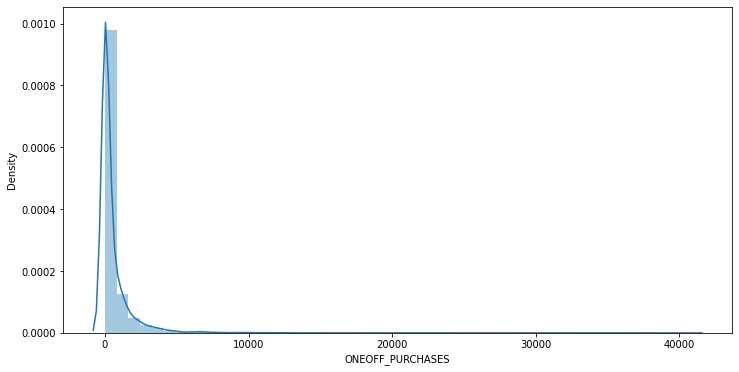

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


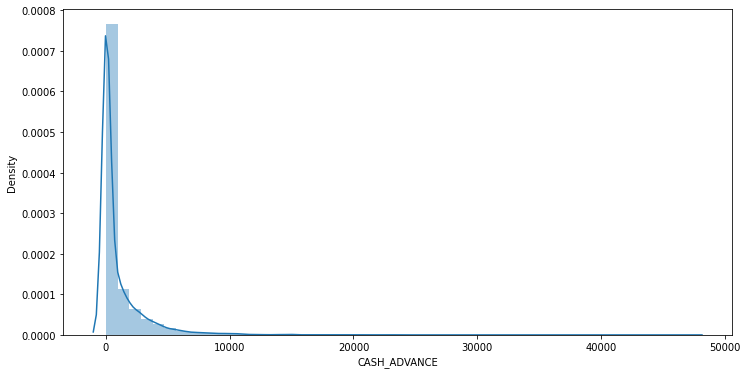

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


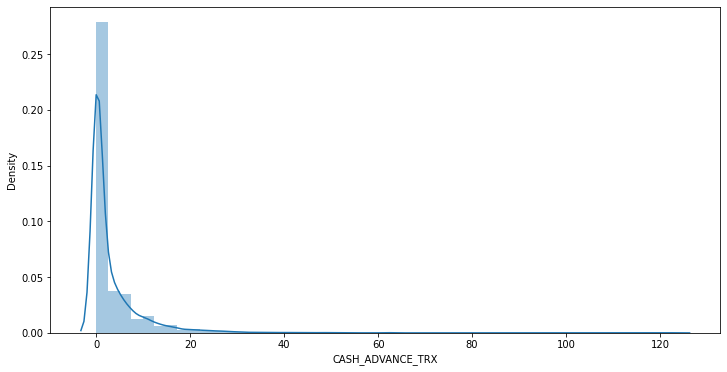

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


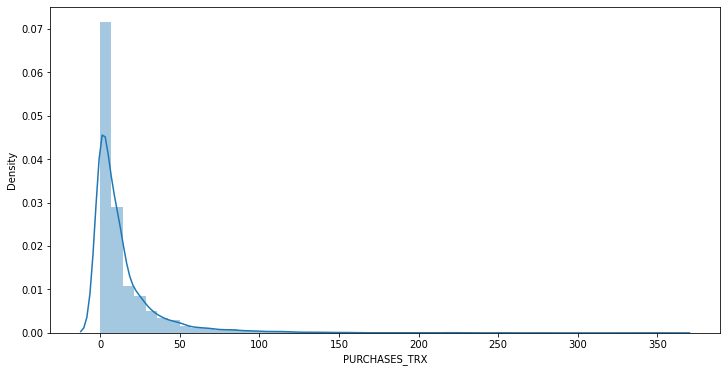

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


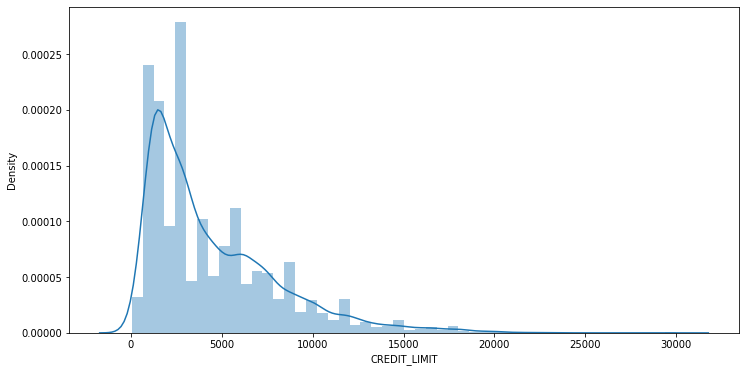

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


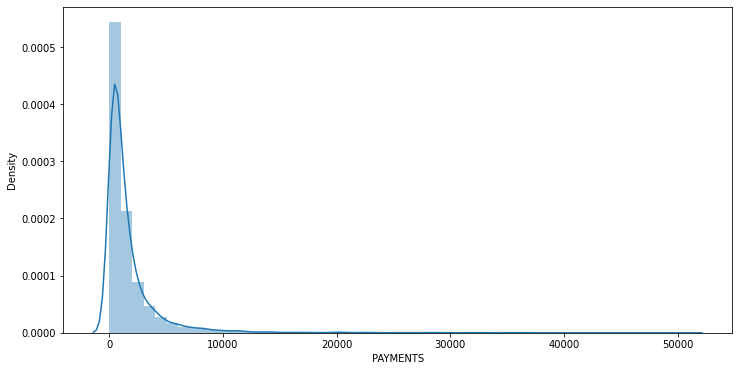

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


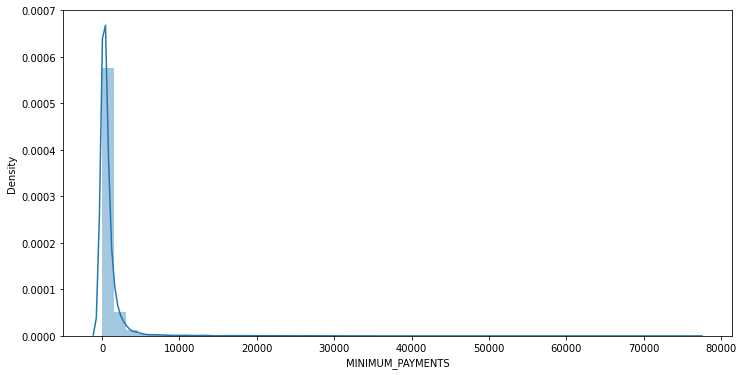

In [18]:
for column in df.columns:
  plt.figure(figsize= (12,6))
  sns.distplot(df[column])
  plt.show()

#Correlação

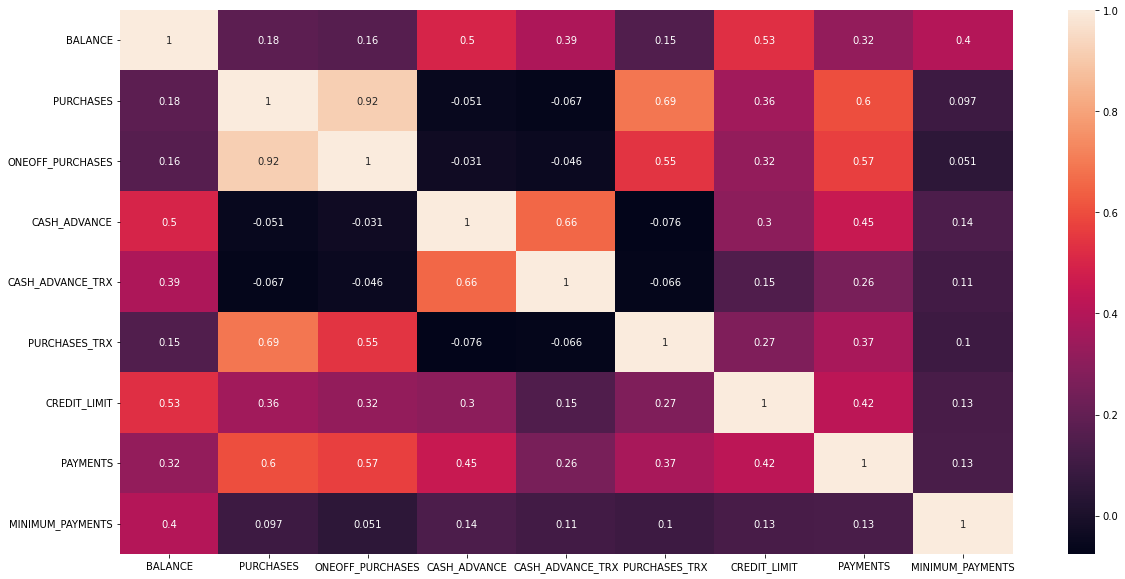

In [19]:
correlação=df.corr()
f,ax=plt.subplots(figsize=(20,10))

sns.heatmap(correlação,annot=True)

#Remover os outliers: selecionar os dados que estejam abaixo dos 95% 

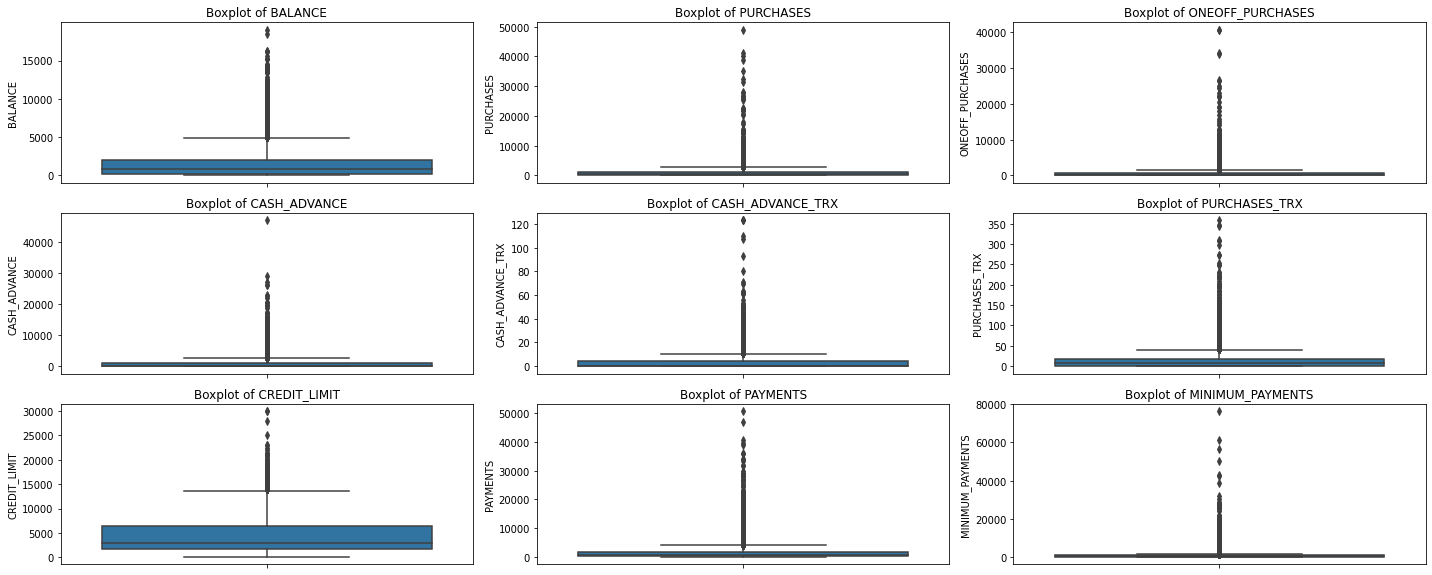

In [20]:
plt.figure(figsize = (20,16))
Features = df.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = df[Features[i]], data = df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [21]:
def outlier_percent(data):
    Q1 = df.quantile(0.5)
    Q3 = df.quantile(0.95)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    return (num_outliers/num_total)*100

In [65]:
categorical_data = df.drop([], axis=1)
for column in categorical_data.columns:
    data = categorical_data[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

ValueError: ignored

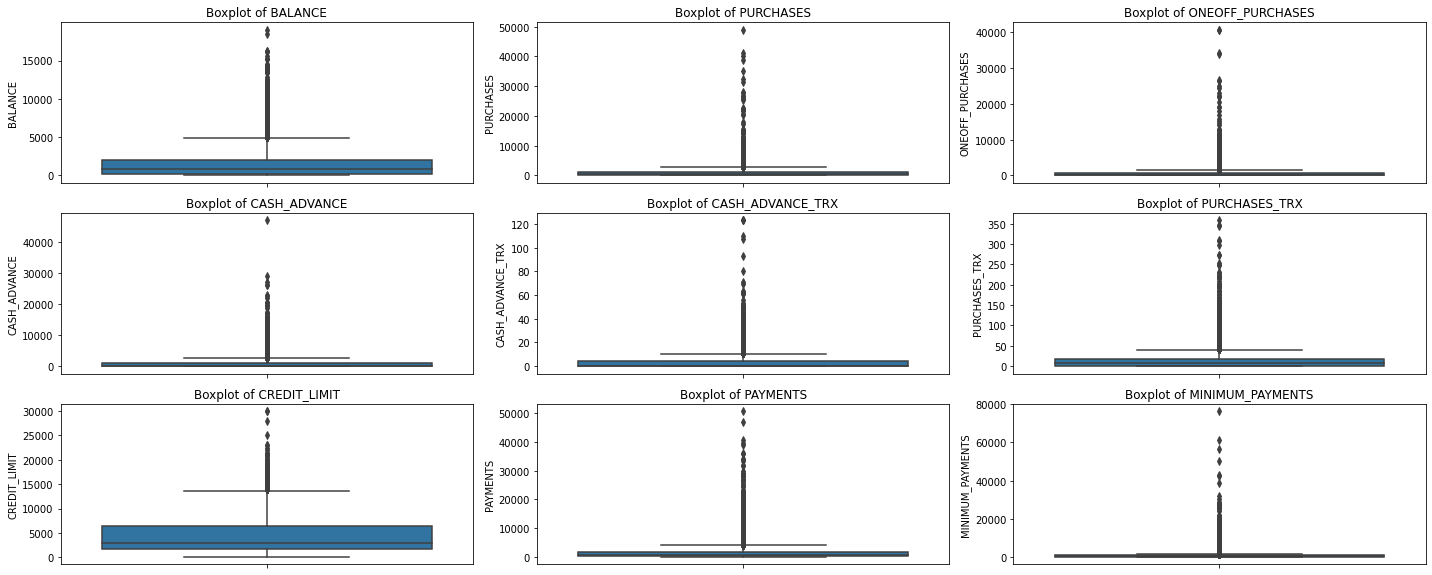

In [23]:
plt.figure(figsize = (20,16))
Features = df.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = df[Features[i]], data = df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [24]:
df.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,592.437371,978.871112,3.248827,14.709832,4493.952864,1733.143852,833.984123
std,2081.531879,2136.634782,1659.887917,2097.163877,6.824647,24.857649,3638.915681,2895.063757,2335.989679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163
25%,128.281915,39.635000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164
50%,873.385231,361.280000,38.000000,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402
75%,2054.140036,1110.130000,577.405000,1113.821139,4.000000,17.000000,6500.000000,1901.134317,788.713501
max,19043.138560,49039.570000,40761.250000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520


In [25]:
(df.describe().transpose()
     [['mean', '50%', 'min', 'max']]
     .rename(columns={'50%': 'median'})
     .style.background_gradient(cmap = 'BrBG'))

,mean,median,min,max
BALANCE,1564.474828,873.385231,0.000000,19043.138560
PURCHASES,1003.204834,361.280000,0.000000,49039.570000
ONEOFF_PURCHASES,592.437371,38.000000,0.000000,40761.250000
CASH_ADVANCE,978.871112,0.000000,0.000000,47137.211760
CASH_ADVANCE_TRX,3.248827,0.000000,0.000000,123.000000
PURCHASES_TRX,14.709832,7.000000,0.000000,358.000000
CREDIT_LIMIT,4493.952864,3000.000000,50.000000,30000.000000
PAYMENTS,1733.143852,856.901546,0.000000,50721.483360
MINIMUM_PAYMENTS,833.984123,289.628402,0.019163,76406.207520


In [26]:
print('min',df['CREDIT_LIMIT'].min())
print('max:',df['CREDIT_LIMIT'].max())
print('soma:', df['CREDIT_LIMIT'].sum())
print('desvio padrao:', df['CREDIT_LIMIT'].std())
print('varian:', df['CREDIT_LIMIT'].var())

min 50.0
max: 30000.0
soma: 40220878.131312996
desvio padrao: 3638.9156810040813
varian: 13241707.333457395


In [27]:
print(df.shape)

(8950, 9)


In [43]:
# padronizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# estatísticas de dados em escala
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,-9.278518e-16,3.916048e-15,5.693056e-15,-7.151821e-16,-3.570713e-15,1.904795e-15,-2.421651e-16,-2.113765e-17,-6.895142e-15
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-4.695519e-01,-3.569340e-01,-4.667856e-01,-4.760698e-01,-5.917959e-01,-1.221298e+00,-5.986883e-01,-3.570271e-01,-7.301764e-01
25%,-6.900078e-01,-4.510006e-01,-3.569340e-01,-4.667856e-01,-4.760698e-01,-5.515646e-01,-7.953233e-01,-4.662913e-01,-2.872416e-01,-7.301764e-01
50%,-3.320286e-01,-3.004541e-01,-3.340396e-01,-4.667856e-01,-4.760698e-01,-3.101767e-01,-4.105718e-01,-3.026846e-01,-2.330430e-01,-7.301764e-01
75%,2.352559e-01,5.004652e-02,-9.056763e-03,6.435242e-02,1.100739e-01,9.213645e-02,5.513069e-01,5.802976e-02,-1.938072e-02,1.422353e+00
max,8.397489e+00,2.248351e+01,2.420107e+01,2.201112e+01,1.754785e+01,1.381101e+01,7.009635e+00,1.692228e+01,3.235307e+01,3.574882e+00


In [45]:
df.isnull().sum()

BALANCE             0
PURCHASES           0
ONEOFF_PURCHASES    0
CASH_ADVANCE        0
CASH_ADVANCE_TRX    0
PURCHASES_TRX       0
CREDIT_LIMIT        0
PAYMENTS            0
MINIMUM_PAYMENTS    0
cluster             0
dtype: int64

Text(0, 0.5, 'Inertia')

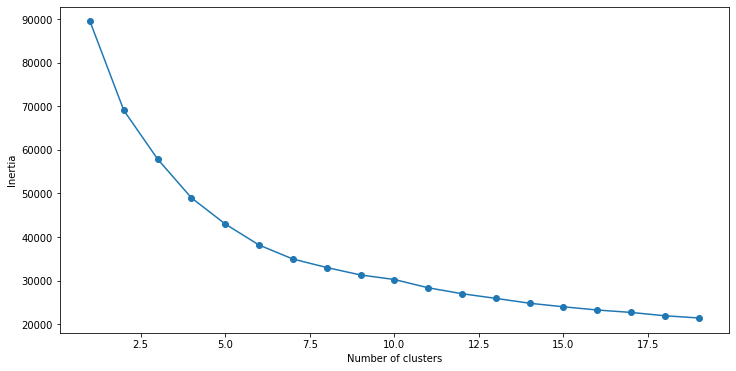

In [46]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
  kmeans = KMeans(n_clusters= cluster, init='k-means++', n_init=10, max_iter=300)
  kmeans.fit(df_scaled)
  SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame= pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [47]:
km = KMeans(5)

In [48]:
km.fit(df)

KMeans(n_clusters=5)

In [49]:
df['cluster']= km.predict(df)

In [50]:
df['cluster'].value_counts()

0    5634
1    2582
2     673
4      37
3      24
Name: cluster, dtype: int64

In [51]:
from sklearn.decomposition import PCA

In [52]:
len(df.columns)

10

In [53]:
df.columns

Index(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'cluster'],
      dtype='object')

In [57]:
FEATURES = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'cluster']

In [58]:
pca = PCA(2)

In [59]:
pca.fit(df[FEATURES])

PCA(n_components=2)

In [60]:
pca.explained_variance_ratio_

array([0.48129469, 0.17853498])

In [61]:
pca_df = pd.DataFrame(pca.transform(df[FEATURES]), columns=['PC1', 'PC2'])

In [62]:
pca_df['cluster'] = df['cluster']

In [63]:
pca_df

,PC1,PC2,cluster
0,-4315.491570,895.680276,0
1,4194.390630,-2241.223433,1
2,1546.267605,-1983.028023,1
3,1320.859203,-1315.609573,1
4,-3721.077309,755.475448,0
...,...,...,...
8945,-4214.622522,1075.478088,0
8946,-4245.709239,1067.788770,0
8947,-4373.015979,877.263220,0
8948,-4774.202952,1015.242889,0


In [71]:
from sklearn.preprocessing import StandardScaler, normalize

In [68]:
raw_df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [77]:
from sklearn.mixture import GaussianMixture

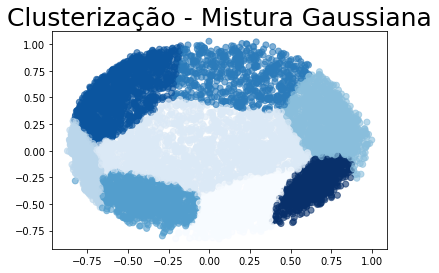

In [79]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(raw_df) 


# Normalizing
normalized_df =  normalize(scaled_df) 

normalized_df = pd.DataFrame(normalized_df) 

# PCA
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

# Plotagem da clusterização (em 2D)
plt.title('Clusterização - Mistura Gaussiana',fontsize=25)
plt.scatter(X_principal['P1'], X_principal['P2'],
c = GaussianMixture(n_components = 8).fit_predict(X_principal), alpha = 0.6,cmap='Blues')
plt.show()
